In [2]:
using Interact, Plots, DifferentialEquations, BifurcationKit, Setfield, Polynomials
using NonLinearDynamicsCourse

# Ecuacion del consumidor

El siguiente modelo es un poco más realista y se conoce como ecuación del consumidor. Es un modelo que aparece en macroeconomia como una simplifación de la dinámica del consumo de un recurso renovable y  no es mas que la ecuacion logistica con un termino de cosecha o consumo que es directamente proporcional a la abundancia del recurso $Px$. El parámetro $P$ corresponde a la tasa de consumo del recurso y $R$ se puede reinterpretar como la tasa de producción o de generación del recurso renovable.  

$ \dot{x} = Rx\left(1-\frac{x}{K}\right) - Px$ 


Notar que como no hay problema de divergencia para $x>0$ ya no necesitamos el callback.

In [3]:
# Ecuacion del consumidor
consumer(x,p,t)=p[1]*x*(1.0-x/p[2])-p[3]*x

consumer (generic function with 1 method)

In [5]:
@manipulate throttle=.05 for R=0:0.02:1.0,K=0.01:0.01:2.0,P=0:0.02:0.5,x0=0:0.02:2.0,tmax=1.0:5.0:50.0
    flux1D(consumer,x0,tmax,[R,K,P];xlims=[-1.0,2.0])
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["R"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 51, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
26, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000000f0a1780, Task (runnable) @0x000000000f0a1780), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.02\",\"0.04\",\"0.06\",\"0.08\",\"0.1\",\"0.12\",\"0.14\",\"0.16\",\"0.18\",\"0.2\",\"0.22\",\"0.24\",\"0.26\",\"0.28\",\"0.3\",\"0.32\",\"0.34\",\"0.36\",\"0.38\",\"0.4\",\"0.42\",\"0.44\",\"0.46\",\

En este caso los puntos fijos son siempre dos y no se produce una bifurcación de nodo silla. Si se fija la tasa de producción $R$ en un valor no demasiado grande y se va incrementando la tasa de consumo $P$ desde cero se observa que al  principio las trayectorias tienden a un punto fijo cercano a $K$ (como en el modelo logístico). A medida que la tasa de consumo se acerca a la de producción el punto fijo se va corriendo hacia la izquierda pero el otro punto fijo que esta en el origen (que es un repulsor como en el modelo logístico) no se modifica.

Evaluando $f(x)=0$ podemos deeterminar las coordenadas de los puntos fijos. 

Un punto fijo esta siempre en $x_*=0$ que es un repulsor para valores de $P$ pequeños.

El otro se mueve con los parámetros y se encuentra en 

$x_* = \displaystyle\frac{K(R-P)}{R}$

que como habiamos mencionado si partimos de $P=0$ es un atractor y a medida que $P$ se incrementa se va corriendo hacia la izquierda. Lo interesante es que cuando la tasa de consumo iguala a la de producción $P=R$ este atractor llega a cero, coalesce con el otro punto fijo repulsor pero no se produce una bifurcacion porque para $P>R$ pasa del lado de los negativos (pasa "a traves" del punto fijo del origen). 

Si evaluamos graficamente las derivadas (pendientes) en esos puntos vamos a ver que luego de cruzar para los valores de $x$ negativos este punto fijo movil pasa a ser un repulsor y el punto fijo del origen se transforma en atractor. Es decir que en el punto en el que coalescen intercambian estabilidad. Esto corresponde a una bifurcación de un nuevo tipo que se conoce como bifurcación transcrítica.

Veamos esto mismo a partir de la linealizacion. La derivada del campo vector es $f'(x)=R-P-2Rx^2/K$. Evaluamos la estabilidad en cada uno de los puntos fijos:

- Para el punto fijo en el origen $x_*=0$ la derivada es $f'(0)=R-P$ con lo cual se trata de un repulsor para $P<R$ y 
de un atractor para $P>R$. Cuando $P=R$ de produce la bifurcación (el cambio de estabilidad en el punto fijo).
- Para el punto fijo $x_*=K(R-P)/R$ la derivada es $f'(K(R-P)/R)=P-R$ que es justo el caso inverso del anterior por lo tanto se trata de un atractor para $P>R$ y de un repulsor para $P>R$. Cuando $P=R$ de produce la bifurcación y el intercambio de estabilidad con el otro punto fijo.

Los puntos fijos cambian de estabilidad de forma simultánea y en la dirección opuesta, de ahí la idea del intercambio de estabilidad y el nombre de transcrítica.

Cuando estudiamos la bifurcacion de nodo silla dijimos que era generica y que no habia forma general de cambiar la estabilidad de un punto fijo sin producir una aniquilación con un par complementario. Que es lo que sucede ahora que puede cambiar la estabilidad de dos puntos fijos sin que se aniquilen entre si? Lo que sucede es que estamos forzando a que $x_0$ sea siempre un punto fijo y eso no es generico. De hecho si perturbamos cualquier sistema que tenga una bifurcacion transcritica pueden pasar dos cosas: o que la bifucacion desaparezca o que se transforme en dos SN.


## Diagrama de Bifurcaciones Consumidor. Bifurcacion Transcritica

En este caso lo que sucede es que a medida que $P$ se incrementa el punto fijo estable en $x_*=K(R-P)/R$ se aproxima a cero, pero no colapsa con el punto fijo en $x_*=0$ sino que pasa del lado de los negativos e intercambia estabilidad. El punto fijo en $x_*=0$ ahora es estable para $P>R$

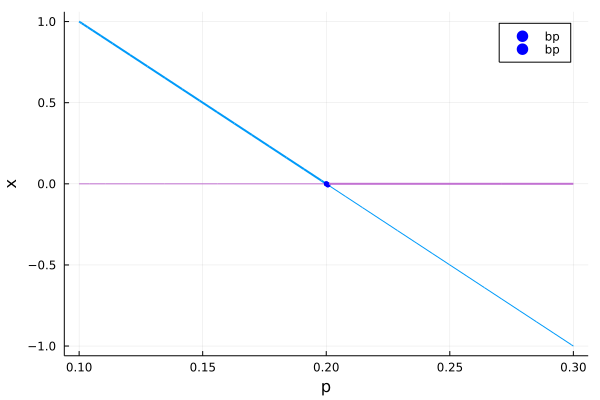

In [4]:
F=(x,p) -> @. consumer(x,(p,),0)
opts = ContinuationPar(pMin=0.1,pMax=0.3, ds = 0.003, dsmax = 0.05, detectBifurcation=3)
br1, = continuation(F,[0.8],[0.2,2.0,0.1],(@lens _[3]), opts; recordFromSolutio n = (x, p) -> x[1])
br2, = continuation(F,[0.0],[0.2,2.0,0.1],(@lens _[3]), opts)
plot(br1)
plot!(br2)

## Potencial de Ecuacion del Consumidor

Al potencial de la logistica se le agrega ahora un término cuadratico $Px^2$ que hace que el potencial tenga siempre una barrera a la izquierda y un pozo a la derecha, solo que en la bifurcacion ambos se encuentran

$V(x) = \frac{Rx^2}{3K}\left(x- \frac{3K}{2}\right) + Px^2$

In [7]:
Vconsumer(x,p) = p[1]*x*x/(3*p[2])*(x-3*p[2]/2)+p[3]*x*x/2
R = 0.2; K=2.0
@manipulate throttle=.05 for P=0.15:0.001:0.25,x0=0:0.01:0.6,tmax=10.0:10.0:200.0
    xmax = max(1.2*x0,0.6)
    potential1D(Vconsumer,x0,tmax,[R,K,P];xlims=[-0.3,xmax])
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["P"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 101, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
51, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000000f291460, Task (runnable) @0x000000000f291460), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.15\",\"0.151\",\"0.152\",\"0.153\",\"0.154\",\"0.155\",\"0.156\",\"0.157\",\"0.158\",\"0.159\",\"0.16\",\"0.161\",\"0.162\",\"0.163\",\"0.164\",\"0.165\",\"0.166\",\"0.167\",\"0.168\",\"0.169\",\"0.17\",\"0.

# Ecuacion Logistica con Harvest mas realista

Ahora el Harvest no es constante sino que depende de la poblacion 

$ \dot{x} = Rx\left(1-\frac{x}{K}\right) - Hx\frac{1}{1+x}$ 

Este sistema va a tener siempre un punto fijo en $x=0$ y puede tener otros dos como solucion de la ecuacion cuadratica:

$x^2-(K-1)x+KH/R-K=0$

Estos puntos fijos van a ser uno estable y otro inestable (se originan en una bifurcacion SN) pero solo van a estar en el eje positivo cuando $K>1$. Notar que como no hay problema de divergencia para $x>0$ ya no necesitamos el callback.

In [8]:
# Ecuacion Logistica con harvest realista
logharvest2(x,p,t)=p[1]*x*(1.0-x/p[2])-p[3]*x/(1+x)

logharvest2 (generic function with 1 method)

In [10]:
@manipulate throttle=.05 for R=0:0.02:2.0,K=0:0.01:2.0,H=0:0.02:0.25,x0=0:0.02:2.0,tmax=1.0:5.0:50.0
    flux1D(logharvest2,x0,tmax,[R,K,H];xlims=[-0.2,2.0])
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["R"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 101, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
51, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000000f291f50, Task (runnable) @0x000000000f291f50), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.02\",\"0.04\",\"0.06\",\"0.08\",\"0.1\",\"0.12\",\"0.14\",\"0.16\",\"0.18\",\"0.2\",\"0.22\",\"0.24\",\"0.26\",\"0.28\",\"0.3\",\"0.32\",\"0.34\",\"0.36\",\"0.38\",\"0.4\",\"0.42\",\"0.44\",\"0.46\",

## Diagrama de bifurcaciones Logistica con Harvest Realista. Nodo Silla + Transcritica

En este caso tambien tenemos una bifurcacion de nodo silla pero en los dos puntos fijos que no son cero.

Estos puntos fijos pueden calcularse a partir de la ecuacion cuadratica como 

$x_* = \frac{K-1}{2} \pm \sqrt{\left(\frac{K-1}{2}\right)^2-\frac{KH}{R}+K}$

y van a colapsar cuando la raiz cuadrada sea cero es decir cuando 

$H = \frac{R}{K}\left(\frac{K-1}{2}\right)^2 + R$

La bifurcacion se produce para ese valor de $H$ y en la coordenada $x=(K-1)/2$

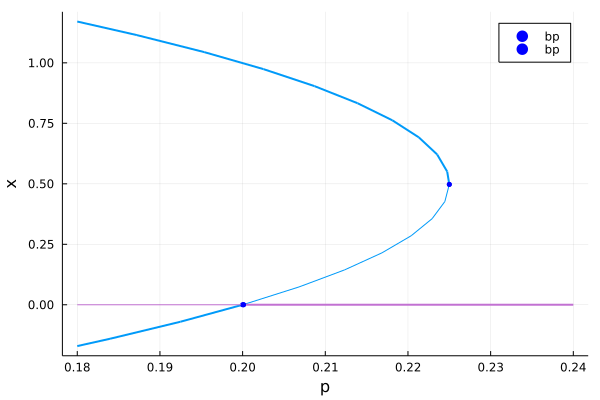

In [11]:
F=(x,p) -> @. logharvest2(x,(p,),0)
opts = ContinuationPar(pMin=0.18,pMax=0.24, ds = 0.04, dsmax = 0.05,detectBifurcation=3)
br1, = continuation(F,[1.0],[0.2,2.0,0.18],(@lens _[3]), opts; recordFromSolution = (x, p) -> x[1])
br2, = continuation(F,[0.1],[0.2,2.0,0.18],(@lens _[3]), opts)
plot(br1)
plot!(br2)

## Potencial de la Ecuacion Logistica con Harvest Realista

Ahora el termino que se le agrega al potencial de la logistica es la antiderivada (o integral indefinida) de $Hx/(1+x)$ que se puede buscar en Wolfram u otro sitio y es igual a $ H\left(x+log(1+x)\right)$.


$V(x) = \frac{Rx^2}{3K}\left(x- \frac{3K}{2}\right) + H\left(x+log(1+x)\right)$

In [12]:
Vlogharvest2(x,p) = p[1]*x*x/(3*p[2])*(x-3*p[2]/2)+p[3]*(x-log(1+x))
R = 0.2; K=2.0
@manipulate throttle=.05 for H=0.18:0.001:0.24,x0=0:0.01:1.2, tmax=10.0:10.0:200.0
    potential1D(Vlogharvest2,x0,tmax,[R,K,H];xlims=[-0.3,1.2])
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["H"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 61, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
31, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000008c45ed60, Task (runnable) @0x000000008c45ed60), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.18\",\"0.181\",\"0.182\",\"0.183\",\"0.184\",\"0.185\",\"0.186\",\"0.187\",\"0.188\",\"0.189\",\"0.19\",\"0.191\",\"0.192\",\"0.193\",\"0.194\",\"0.195\",\"0.196\",\"0.197\",\"0.198\",\"0.199\",\"0.2\",\"0.20

# Ecuacion Logistica con OutBreak

Se agrega a la ecuacion logistica un termino con la funcion del predador

$\dot{x} = Rx(1-x/K)-P\frac{x^2}{1+x^2}$

En este caso no basta una cuadratica para calcular los puntos fijos. Pero $x=0$ sigue siendo un punto fijo repulsor. Y bajo ciertas condiciones tenemos dos puntos fijos atractores separados por un repulsor.

In [13]:
# Ecuacion Logistica con Outbreak
logoutbreak(x,p,t)=p[1]*x*(1.0-x/p[2])-p[3]*x*x/(1+x*x)

logoutbreak (generic function with 1 method)

In [14]:
@manipulate throttle=.05 for R=0:0.02:2.0,K=0:0.1:10.0,P=0:0.01:2.0,x0=0:0.05:8.0,tmax=10.0:5.0:100.0
    flux1D(logoutbreak,x0,tmax,[R,K,P];xlims=[-0.2,8.0])
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["R"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 101, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
51, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000077731dc0, Task (runnable) @0x0000000077731dc0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.02\",\"0.04\",\"0.06\",\"0.08\",\"0.1\",\"0.12\",\"0.14\",\"0.16\",\"0.18\",\"0.2\",\"0.22\",\"0.24\",\"0.26\",\"0.28\",\"0.3\",\"0.32\",\"0.34\",\"0.36\",\"0.38\",\"0.4\",\"0.42\",\"0.44\",\"0.46\",

## Diagrama de bifurcaciones Logistica con Outbreak. Doble Nodo Silla

En este caso tenemos dos bifurcaciones SN que ocurren en direcciones opuestas 

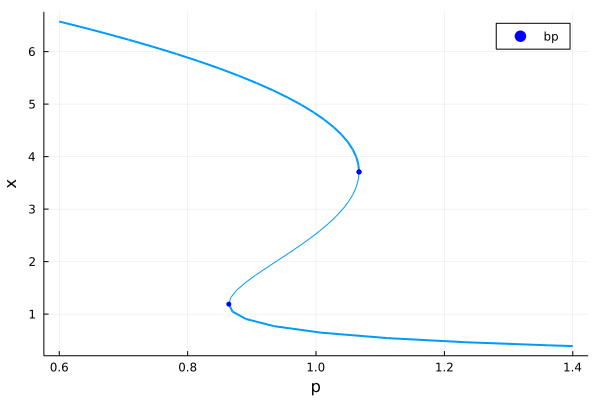

In [15]:
F=(x,p) -> @. logoutbreak(x,(p,),0)
opts = ContinuationPar(pMin=0.6,pMax=1.4, detectBifurcation=3)
br1, = continuation(F,[6.5],[0.5,8.0,0.6],(@lens _[3]), opts)
plot(br1)

Los tres puntos fijos (dos atractores y un repulsor) salen de resolver la siguiente ecuacion (se puede obtener a partir de igualar a cero la ecuacion diferencial)

$x^3-Kx^2+x(1+KP/R)-K=0$

Que se puede resolver numericamente pasando los coeficientes del polinomio, para un valor dado de K y R obtenemos las tres raices del polinomio. Si obtenemos tres raices reales esos son los tres puntos fijos

Si en cambio alguna de las raices es compleja con parte imaginaria diferente de cero entonces no corresponde a un punto fijo. En este caso tenemos un solo punto fijo

In [16]:
K = 8.0; R=0.5
@manipulate throttle=.1 for P=0.6:0.005:1.2
    pr = filter(isreal,roots(Polynomial([-K,1.0+K*P/R,-K,1.0])))
    plot(br1)
    scatter!(repeat([P],length(pr)),real(pr),label="PF")
end 

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["P"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 121, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
61, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000007652b9e0, Task (runnable) @0x000000007652b9e0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.6\",\"0.605\",\"0.61\",\"0.615\",\"0.62\",\"0.625\",\"0.63\",\"0.635\",\"0.64\",\"0.645\",\"0.65\",\"0.655\",\"0.66\",\"0.665\",\"0.67\",\"0.675\",\"0.68\",\"0.685\",\"0.69\",\"0.695\",\"0.7\",\"0.705\",\"0.

## Potencial de la Ecuacion Logistica con Outbreak

Ahora el termino que se le agrega al potencial de la logistica es la antiderivada (o integral indefinida) de $Px^2/(1+x^2)$ que es igual a $P\left(x-atan(x)\right)$.


$V(x) = \frac{Rx^2}{3K}\left(x- \frac{3K}{2}\right) + P\left(x-atan(x)\right)$

In [18]:
Vlogoutbreak(x,p) = p[1]*x*x/(3*p[2])*(x-3*p[2]/2)+p[3]*(x-atan(x))
R = 0.5; K=8.0
@manipulate throttle=.05 for P=0.8:0.001:1.2,x0=0:0.01:6.0, tmax=10.0:10.0:200.0
    potential1D(Vlogoutbreak,x0,tmax,[R,K,P];xlims=[0.0,6.0])
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["P"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 401, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
201, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000082c84010, Task (runnable) @0x0000000082c84010), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.8\",\"0.801\",\"0.802\",\"0.803\",\"0.804\",\"0.805\",\"0.806\",\"0.807\",\"0.808\",\"0.809\",\"0.81\",\"0.811\",\"0.812\",\"0.813\",\"0.814\",\"0.815\",\"0.816\",\"0.817\",\"0.818\",\"0.819\",\"0.82\",\"0.